# Problem Statement:

### Sales Channel Prediction Case Study

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

**The below link provided is for downloading the dataset.**

Downlaod Files: https://github.com/dsrscientist/DSData/blob/master/Advertising.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv',)
print('{Rows , Columns} :' +str(df.shape))
df.head()

{Rows , Columns} :(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

## Statistical Summary

In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Comment -

1. There is lot difference between 75 th percentile and max in newspaper. So there is possibility of outliers.
2. TV Column has huge standard deviation so data is possibly spread.
3.  Minimum value of radio is zero so we get unique data point where we can analyze sales just based on TV and Newspaper.

**Checking null value or missing data**

<AxesSubplot:>

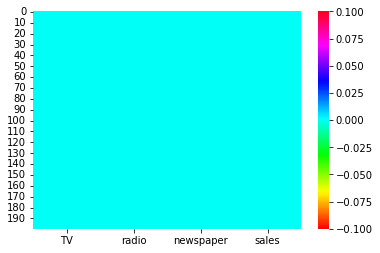

In [6]:
sns.heatmap(df.isnull(),cmap='hsv')

In [7]:
missing_values =df.isnull().sum().sort_values(ascending=False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis=1, keys=['Missing Values','% Missing Data']))

           Missing Values  % Missing Data
TV                      0             0.0
radio                   0             0.0
newspaper               0             0.0
sales                   0             0.0


## Univariate Analysis

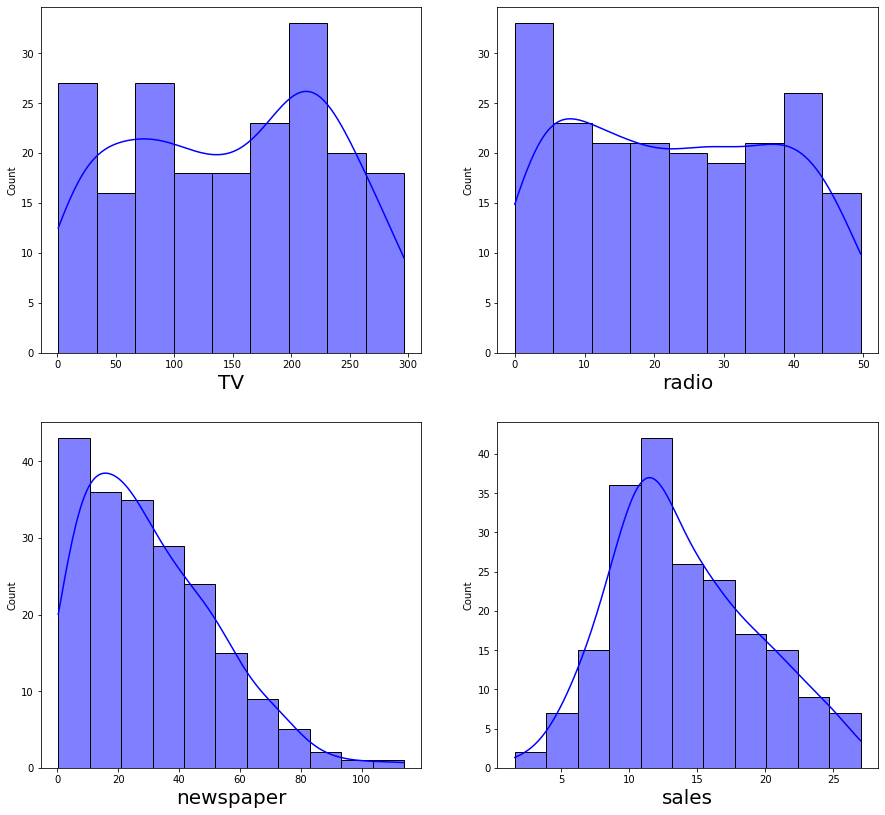

In [8]:
plt.figure(figsize=(15,14), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=4:
        ax =plt.subplot(2,2,plotnumber)
        sns.histplot(df[column],color ='b', kde=True)
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

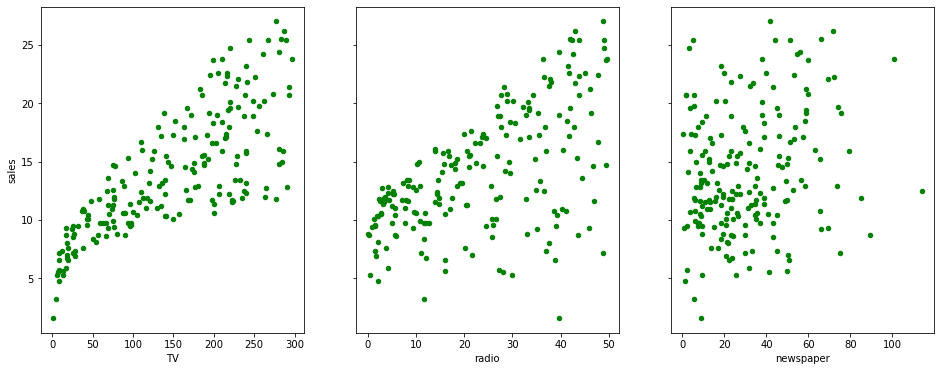

In [9]:
fig, axs =plt.subplots(1,3,sharey=True)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,6),color ='g')
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1],color ='g')
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2],color ='g')
plt.show()

## Multivariate Analysis

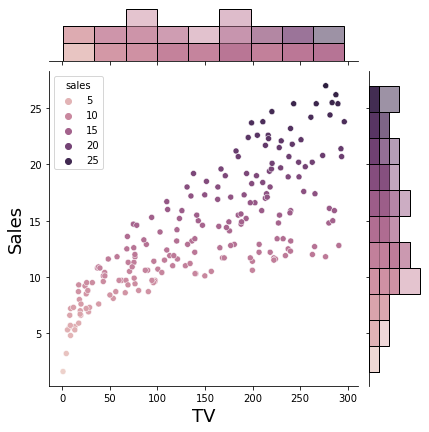

In [10]:
t= sns.JointGrid(data=df, x='TV', y='sales',hue='sales')
t.plot(sns.scatterplot, sns.histplot, color='r')
t.set_axis_labels(xlabel='TV', ylabel='Sales', fontsize=18)

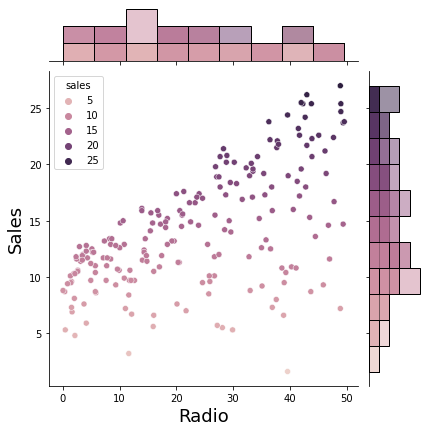

In [11]:
r= sns.JointGrid(data=df, x='radio',y='sales', hue='sales')
r.plot(sns.scatterplot, sns.histplot,color='r')
r.set_axis_labels(xlabel='Radio',ylabel='Sales', fontsize=18)

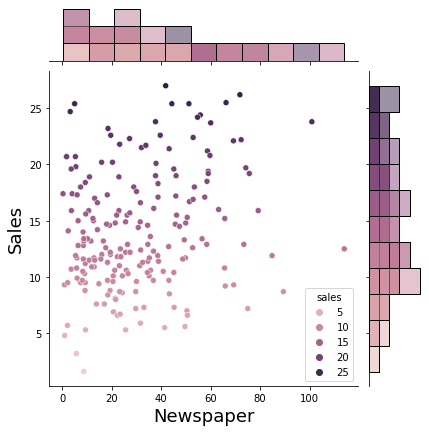

In [12]:
sns.set_palette("hsv", 8)
n= sns.JointGrid(data=df, x='newspaper', y='sales', hue='sales')
n.plot(sns.scatterplot, sns.histplot, color='r')
n.set_axis_labels(xlabel='Newspaper', ylabel='Sales', fontsize=18)

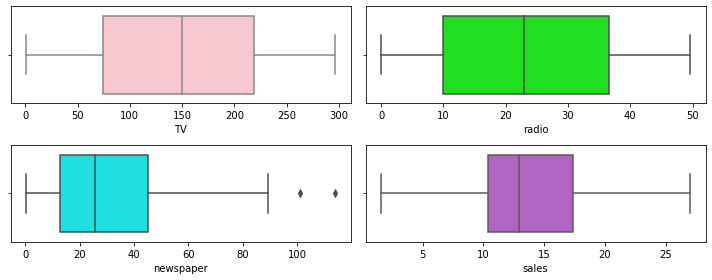

In [13]:
fig, ((axs0,axs1),(axs2,axs3))=plt.subplots(2,2, figsize=(10,4) )
sns.boxplot(df['TV'],color ='Pink', ax=axs0)
sns.boxplot(df['radio'],color= 'lime', ax=axs1)
sns.boxplot(df['newspaper'],color= 'cyan', ax=axs2)
sns.boxplot(df['sales'],color= 'mediumorchid', ax=axs3)
plt.tight_layout()

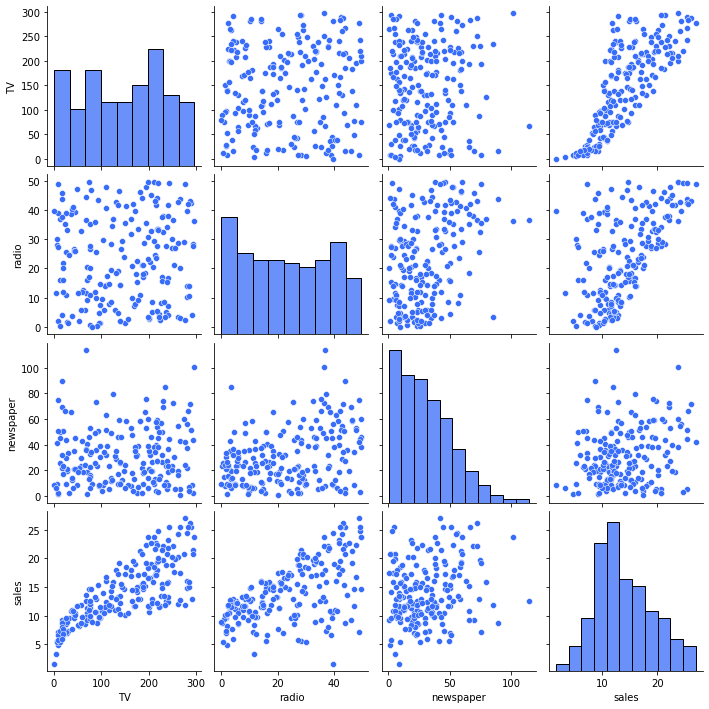

In [14]:
sns.set_palette('rainbow')
sns.pairplot(df)

## Correlation

In [15]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


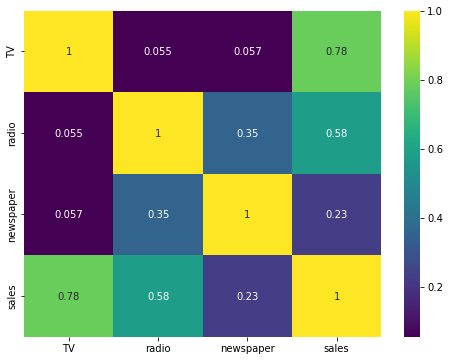

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap='viridis')
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

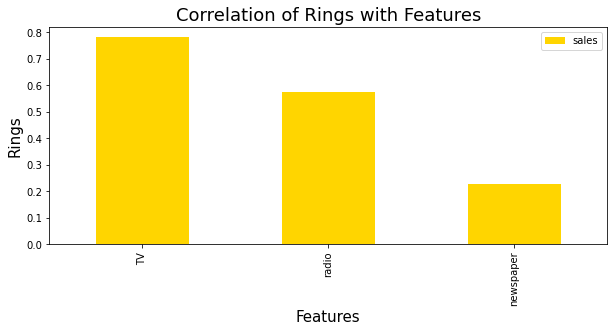

In [17]:
sns.set_palette('hsv')
plt.figure(figsize=(10,4))
df.corr()['sales'].drop(['sales']).plot(kind='bar')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Rings', fontsize=15)
plt.title('Correlation of Rings with Features', fontsize=18)
plt.legend()
plt.show()

## Outliers Detection basesd on IQR

In [19]:
df2=df.copy()
Q1=df2.quantile(0.25)
Q3=df2.quantile(0.75)
IQR=Q3-Q1
print(IQR)

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64


In [20]:
df_new=df2[~((df <(Q1 -1.5 * IQR)) | (df > (Q3 + 1.5*IQR))).any(axis=1)]
df_new.shape

(198, 4)

### Data Loss

In [21]:
print('\033[1m' +'Percentage Loss :' +'\033[0m', (((200-198)/200)*100),"%")

Percentage Loss : 1.0 %


## Multicollinearity and Skewness Handling

In [22]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

Transforming positive or right skew data using boxcox transformation

In [23]:
from scipy.stats import boxcox

In [24]:
df_new['newspaper']=boxcox(df_new['newspaper'],0.5)

In [25]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

### Heatmap of correlation after removing outliers

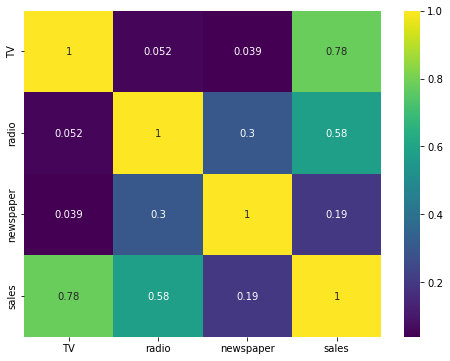

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df_new.corr(), annot=True, cmap='viridis')
plt.show()

### Comment -
1. Correlation of newspaper with others features has decrease after removing outliers and skewness.
2. Correlation of radio with tv has decrease.

## Checking Multicollinearity between features using variance_inflation_factor

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_new.values,i) for i in range(df_new.shape[1])]
vif['Features']=df_new.columns
vif

,VIF,Features
0,23.370622,TV
1,12.174860,radio
2,4.521733,newspaper
3,58.960569,sales


## Standard Scaling

In [29]:
X=df_new.drop(columns=['sales'])
Y=df_new['sales']

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
Scaler=StandardScaler()
X_scale=Scaler.fit_transform(X)

In [32]:
X_scale

array([[ 9.78697339e-01,  9.89521352e-01,  1.63669060e+00],
       [-1.19901165e+00,  1.09070498e+00,  8.24807889e-01],
       [-1.51933199e+00,  1.53591293e+00,  1.63973373e+00],
       [ 5.64563564e-02,  1.22561648e+00,  1.29728802e+00],
       [ 4.00243389e-01, -8.31783915e-01,  1.29397566e+00],
       [-1.61906543e+00,  1.73828018e+00,  1.80970327e+00],
       [-1.04647815e+00,  6.52242599e-01, -1.21277595e-01],
       [-3.10797368e-01, -2.38173309e-01, -8.51517342e-01],
       [-1.62023876e+00, -1.41864895e+00, -2.07003868e+00],
       [ 6.23176960e-01, -1.38492107e+00, -2.44520695e-01],
       [-9.45571378e-01, -1.16906267e+00, -8.49785485e-02],
       [ 7.98003813e-01,  5.86319933e-02, -1.56356175e+00],
       [-1.44189191e+00,  8.07390825e-01,  1.53500409e+00],
       [-5.77144318e-01, -1.04764232e+00, -1.21749539e+00],
       [ 6.73630347e-01,  6.58988174e-01,  8.58578063e-01],
       [ 5.71550238e-01,  1.65733328e+00,  1.10721196e+00],
       [ 1.58061798e+00,  1.11094170e+00

# Machine Learning Model Building

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (138, 3)
Training target vector size: (138,)
Test feature matrix size: (60, 3)
Test target vector size: (60,)


### Finding Best Random state

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.3)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9378126888916722 on Random_state 203


## Linear Regression : Base model

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=203, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted sales:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual sales:'+'\033[0m\n',Y_test)

Predicted sales:
 [ 5.86754273 11.32299306 14.7309159  20.2453337  23.07300576  6.54355229
 15.37488546 13.76980996 10.34804118 23.63133191  8.1430896   9.86996375
  7.88214142  9.4893401   9.47799083 16.10597158 16.12452802 20.37583961
 17.04004228 11.52673186 11.74090766 23.96358824 20.92900251 12.92895267
 11.18148895 18.00753606 21.48037593 19.31753762 12.40597781  6.33618158
 19.39626512 15.26075799 17.89362724  6.31555802 10.79819722 18.24809448
  9.06355217  8.64896533  9.44289126 19.08465575  8.55877535 14.9517202
 17.40277377  6.87301823 11.12826823 13.74246031 12.52911733 11.96847352
 14.55595096 15.03116942 12.1688556  22.72976561 18.24817393  8.88528663
  7.31894511 18.2079286  18.75155606  9.6901316  14.81201327  7.12705871]


Actual sales:
 106     7.2
86     12.0
26     15.0
39     21.5
147    25.4
119     6.6
37     14.7
43     12.9
180    10.5
198    25.5
191     9.9
144    11.4
24      9.7
138     9.6
186    10.3
48     14.8
95     16.9
0      22.1
11     17.4
88     

## Linear Regression Evaluation Matrix

In [37]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 1.039369514609054
Mean squared error : 1.5391005377122864
Root Mean Squared Error: 1.2406049079833137


 R2 Score :
0.9378126888916722


 True Values Vs Predicted Value plot :


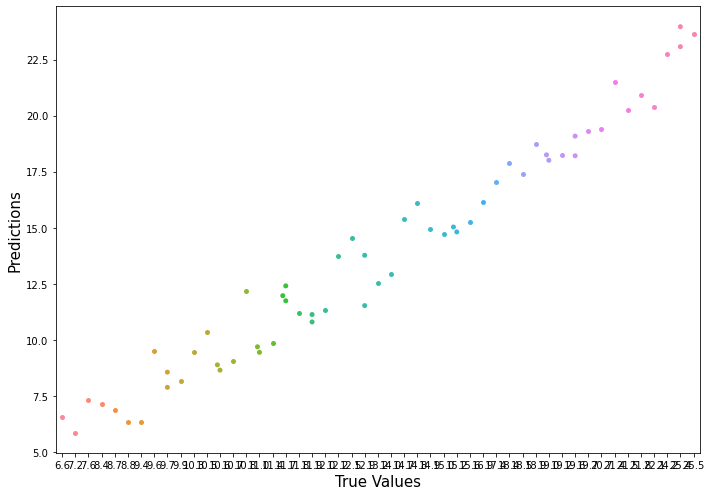

In [38]:
plt.figure(figsize=(10,7))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred, cmap='hsv')
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Finding n_neighbors for KNN Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.3334791586922785
RMSE value for k=  2 is: 1.070027258219777
RMSE value for k=  3 is: 0.8090117428072351
RMSE value for k=  4 is: 0.8907043093342856
RMSE value for k=  5 is: 0.9100988957250743
RMSE value for k=  6 is: 0.9497831136438268
RMSE value for k=  7 is: 0.9496562213640838
RMSE value for k=  8 is: 0.9487738798048774
RMSE value for k=  9 is: 0.991060869013874
RMSE value for k=  10 is: 0.9525920777891591
RMSE value for k=  11 is: 0.9711627179795302
RMSE value for k=  12 is: 1.0004287275407924
RMSE value for k=  13 is: 1.0067787990893817
RMSE value for k=  14 is: 1.087152477899987
RMSE value for k=  15 is: 1.1214517707302767
RMSE value for k=  16 is: 1.185261047195933
RMSE value for k=  17 is: 1.2328126336225536
RMSE value for k=  18 is: 1.297779244354828
RMSE value for k=  19 is: 1.3060543371817586
RMSE value for k=  20 is: 1.351802654482771


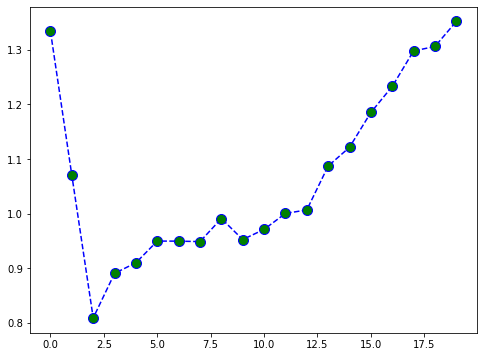

In [40]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

### Comment-
At k= 3, we get the minimum RMSE value which approximately 0.8090117428072351, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case

## Applying other Regression Model

In [41]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor(n_neighbors=16)
xgb=XGBRegressor()
model = [rf,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5277333333333354
Mean squared error : 0.44626353333333524
Root Mean Squared Error: 0.6680295901629921


 R2 Score :
0.9819687353076024




 Error of  SVR() :
Mean absolute error : 0.732798150503364
Mean squared error : 1.539458733851608
Root Mean Squared Error: 1.2407492630872718


 R2 Score :
0.937798215987396




 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.7499999999999998
Mean squared error : 1.005666666666667
Root Mean Squared Error: 1.0028293307770106


 R2 Score :
0.9593660684673441




 Error of  AdaBoostRegressor() :
Mean absolute error : 0.7247752524675183
Mean squared error : 0.8232461762890021
Root Mean Squared Error: 0.9073291444062634


 R2 Score :
0.9667367629149671




 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.4568592906489953
Mean squared error : 0.32291858659307465
Root Mean Squared Error: 0.5682592600152457


 R2 Score :
0.9869524841847083




 Error of  KNeighborsRe

**Here we can see that GradientBoostingRegressor() algorithm gives maximum R2 score : 0.9869528650314916 with Minimum Root Mean Squared Error: 0.568250966433019**



 True Values Vs Predicted Value plot RandomForestRegressor() :


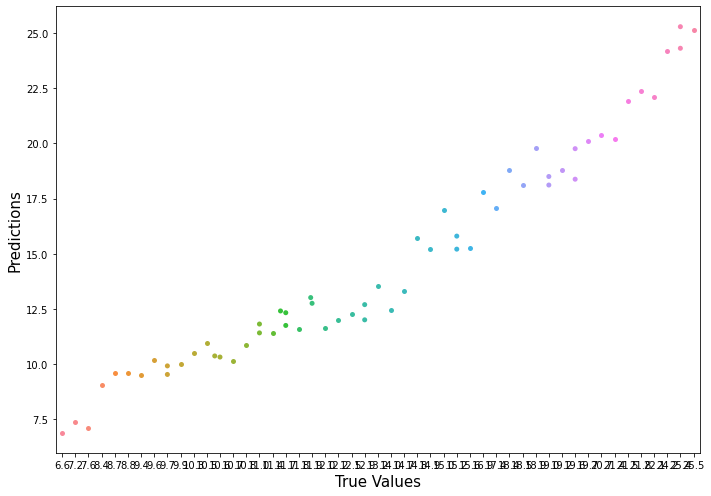





 True Values Vs Predicted Value plot SVR() :


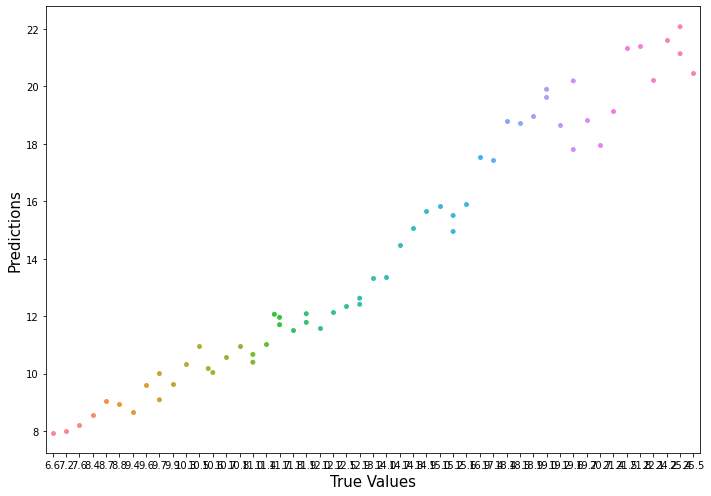





 True Values Vs Predicted Value plot DecisionTreeRegressor() :


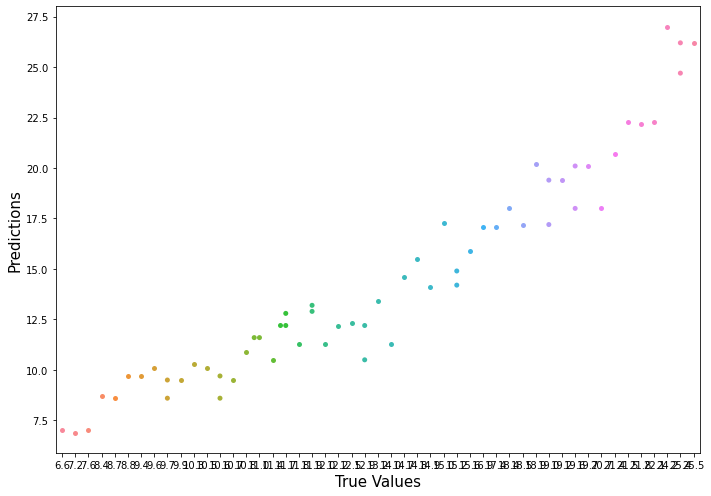





 True Values Vs Predicted Value plot AdaBoostRegressor() :


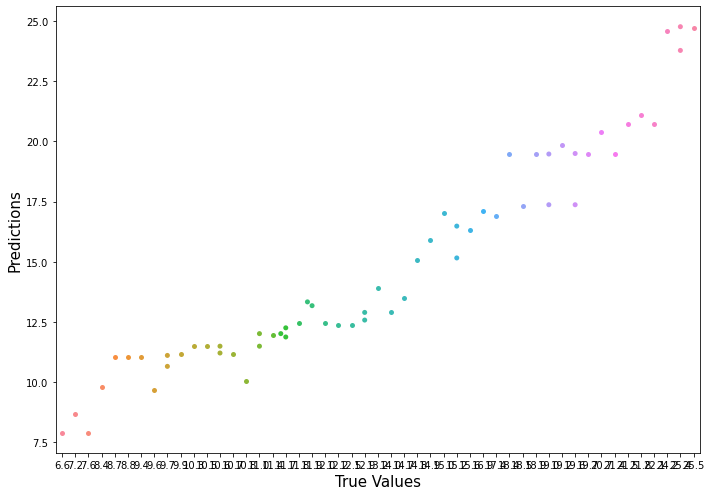





 True Values Vs Predicted Value plot GradientBoostingRegressor() :


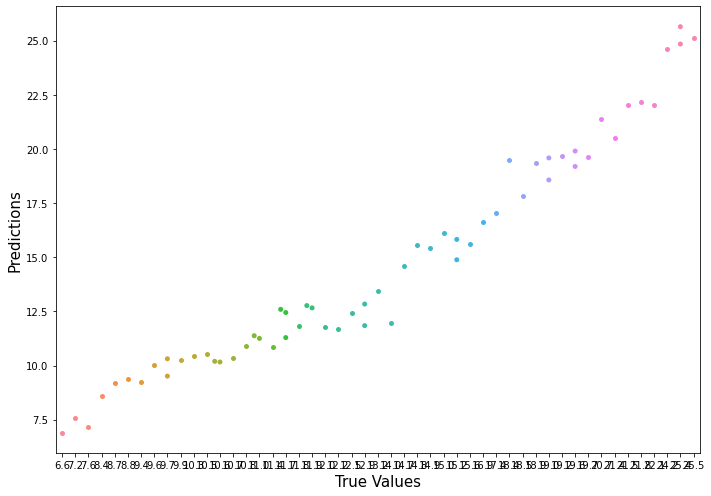





 True Values Vs Predicted Value plot KNeighborsRegressor(n_neighbors=15) :


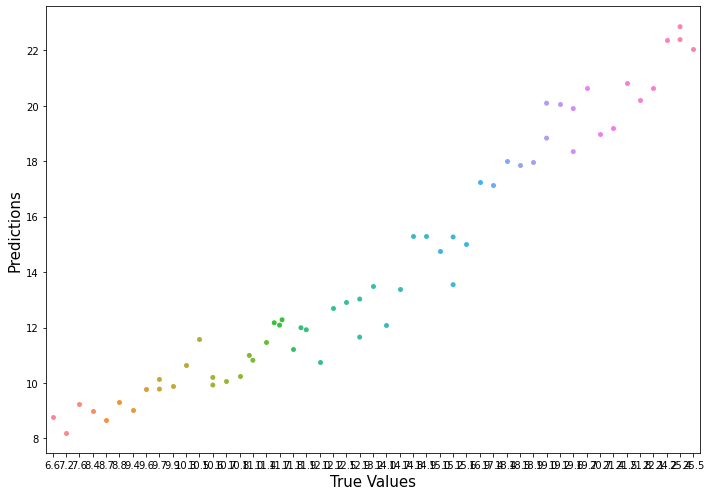





 True Values Vs Predicted Value plot XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) :


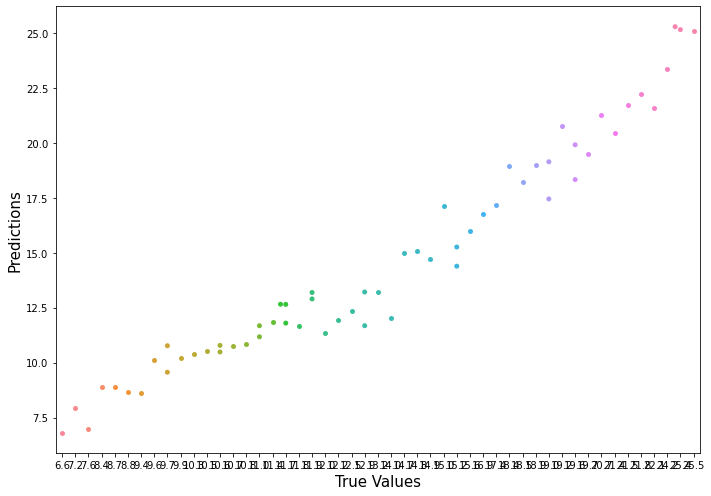

In [42]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
knn=KNeighborsRegressor(n_neighbors=15)
model = [rf,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(10,7))
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.swarmplot(Y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

## Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
model = [lin_reg,rf,svr,dtc,adb,gradb,knn,xgb]
for m in model:
    score = cross_val_score(m, X, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('\n')
    print('==============================================================================================================')



Cross Validation Score : LinearRegression() :

Score : [0.88773334 0.91453399 0.84871665 0.90260192]
Mean Score : 0.8883964730592853
Std deviation : 0.024798654017717053


 R2 Score :
0.9798847917413049




Cross Validation Score : RandomForestRegressor() :

Score : [0.97950875 0.98128465 0.97309095 0.97699374]
Mean Score : 0.9777195223454674
Std deviation : 0.003076598883817505


 R2 Score :
0.9798847917413049




Cross Validation Score : SVR() :

Score : [0.83403109 0.80827576 0.85366538 0.77893763]
Mean Score : 0.818727463665703
Std deviation : 0.028050525227050354


 R2 Score :
0.9798847917413049




Cross Validation Score : DecisionTreeRegressor() :

Score : [0.95237981 0.93764543 0.93456468 0.91927476]
Mean Score : 0.9359661720463188
Std deviation : 0.011755794797789338


 R2 Score :
0.9798847917413049




Cross Validation Score : AdaBoostRegressor() :

Score : [0.95576463 0.97417978 0.94981446 0.94472116]
Mean Score : 0.9561200096086633
Std deviation : 0.011135250300184803


 

**From above cross validattion, we can see that Gradient Boosting Regressor() gives us maximum R2 score(0.9798847917413049) and with maximum mean score of 0.9792164529724043. So we will apply Hyperparameter tuning on Gradient Boosting Regressor**

## Hyper Parameter Tuning : GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
parameters = [{    'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.7,0.5, 0.3, 0.1],
                  'n_estimators' : [100,250,500,750],
                  'max_depth'    : [4,6,8,10]}] 

In [46]:
GCV = GridSearchCV(GradientBoostingRegressor(),parameters,cv=4,n_jobs = -1, verbose=5)
GCV.fit(X_train,Y_train)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits


GridSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.02, 0.03, 0.04],
                          'max_depth': [4, 6, 8, 10],
                          'n_estimators': [100, 250, 500, 750],
                          'subsample': [0.7, 0.5, 0.3, 0.1]}],
             verbose=5)

In [47]:
GCV.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 750, 'subsample': 0.3}

# Final Model

In [48]:
Final_mod = GradientBoostingRegressor(learning_rate=0.04 ,n_estimators= 750, max_depth=10 ,subsample=0.3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.3419878164649538
Mean squared error : 0.17777164407394244
Root Mean Squared Error: 0.42162974761506383


 R2 Score of Final Model :
0.9928171420479799




 True Values Vs Predicted Value plot :


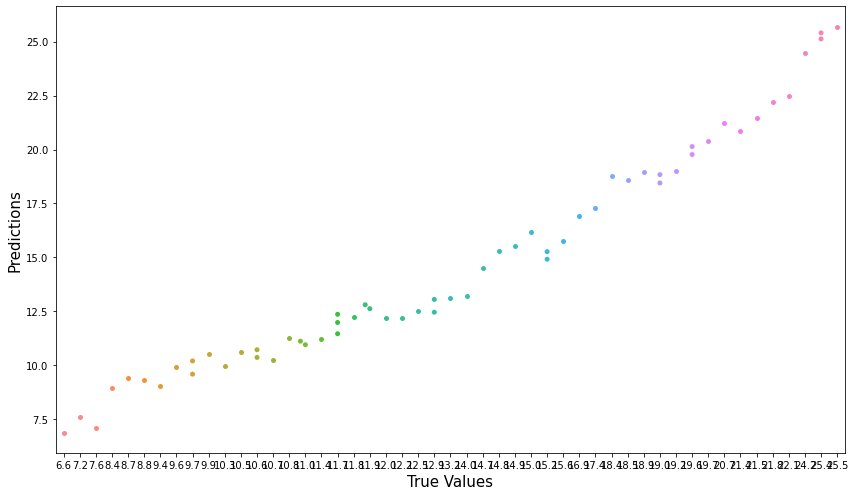

In [49]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

<AxesSubplot:>

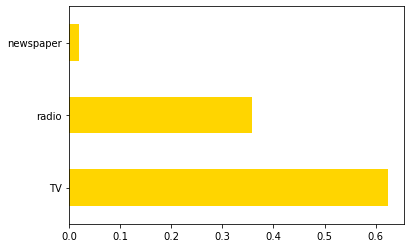

In [50]:
feat_importances = pd.Series(Final_mod.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest()
feat_importances.plot(kind='barh')

**'TV' is most imporatnt feature for this model.**

## Saving Model

In [51]:
import joblib
joblib.dump(Final_mod,'Advertising Sales_Final.pkl')

['Advertising Sales_Final.pkl']